In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [3]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Observation 1
1. There are 81 fearures, including an Id
2. Columns have Nan values

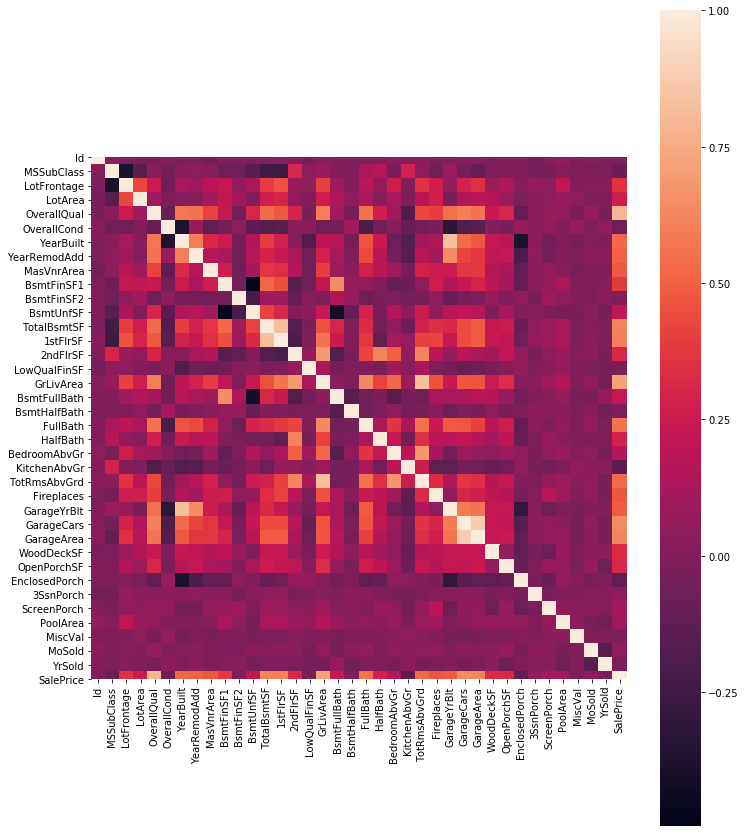

In [4]:
#Let us check the missing values and correlation between the features, if possible
ax, f = plt.subplots(figsize=(12,15))
sns.heatmap(df1.corr(), square=True)

In [5]:
#This is challenging to infer(atleast for me), so going to try manual check for correlation value >0.7
df1.corr().to_csv('t1.csv')
df2.corr().to_csv('t2.csv')

Observation 2:
1. OverallQual & SalePrice - 0.791
2. GarageYrBlt & YearBuilt - 0.826
3. TotalBsmtSF & 1stFlrSF - 0.820
4. TotRmsAbvGrd & GrLivArea - 0.825
5. SalePrice & GrLivArea - 0.709
6. GarageCars & GarageArea - 0.882

This analysis gives OverallQual, GrLivArea are critical in high correlation with SalePrice
Remaining correlation can be checked and highly collinear features can be removed to adjust noise


In [6]:
#Let us get the missing values now
miss_col_train=df1.columns[df1.isna().any()].tolist()
miss_col_test=df2.columns[df2.isna().any()].tolist()
print(miss_col_train)
print(miss_col_test)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [7]:
for i in miss_col_train:
    miss_perc1=100-(df1[i].count()/len(df1[i]))*100
    print(i,"  missing percentage values %2.2f "%miss_perc1)
print('\n********************************\n')
for j in miss_col_test:
    miss_perc2=100-(df2[j].count()/len(df2[j]))*100
    print(j,"  missing percentage values %2.2f "%miss_perc2)

LotFrontage   missing percentage values 17.74 
Alley   missing percentage values 93.77 
MasVnrType   missing percentage values 0.55 
MasVnrArea   missing percentage values 0.55 
BsmtQual   missing percentage values 2.53 
BsmtCond   missing percentage values 2.53 
BsmtExposure   missing percentage values 2.60 
BsmtFinType1   missing percentage values 2.53 
BsmtFinType2   missing percentage values 2.60 
Electrical   missing percentage values 0.07 
FireplaceQu   missing percentage values 47.26 
GarageType   missing percentage values 5.55 
GarageYrBlt   missing percentage values 5.55 
GarageFinish   missing percentage values 5.55 
GarageQual   missing percentage values 5.55 
GarageCond   missing percentage values 5.55 
PoolQC   missing percentage values 99.52 
Fence   missing percentage values 80.75 
MiscFeature   missing percentage values 96.30 

********************************

MSZoning   missing percentage values 0.27 
LotFrontage   missing percentage values 15.56 
Alley   missing perc

In [8]:
#On checking the data description, leaving few features, rest missing can be inferred as Not Applicable/ Not Available. 
#For eg. missing values in Alley cabn be rightly interpreted as No Alley and not as None. So we group such features and
#replace their missing values as appropriate
new_miss_column = ['Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                   'BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','FireplaceQu',
                   'GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageQual','GarageCond',
                   'PoolQC','Fence','MiscFeature']

for i in new_miss_column:
    df1[i].fillna('Not Applicable', inplace=True)
    df2[i].fillna('Not Applicable', inplace=True)

In [9]:
#Let us re-check the missing columns again
miss_col_train=df1.columns[df1.isna().any()].tolist()
miss_col_test=df2.columns[df2.isna().any()].tolist()
print(miss_col_train)
print(miss_col_test)

['LotFrontage', 'Electrical']
['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'GarageArea', 'SaleType']


In [10]:
#The left over columns are not items that are Not Applicable, so let us make them as most common occurence if the feature is categorical
obj_col_train=[]
obj_col_test=[]
for i in miss_col_train:
    if df1[i].dtype=='object':
        obj_col_train.append(i)
        miss_col_train.remove(i)

print('\n***********************\n')  

for i in miss_col_test:
    if df2[i].dtype=='object':
        obj_col_test.append(i)
        miss_col_test.remove(i)
        

print(obj_col_train, obj_col_test)
print('Non object columns  ', miss_col_train, miss_col_test)


***********************

['Electrical'] ['MSZoning', 'Utilities', 'Exterior2nd', 'Functional', 'SaleType']
Non object columns   ['LotFrontage'] ['LotFrontage', 'Exterior1st', 'KitchenQual', 'GarageArea']


In [11]:
#Replacing the categorical columns with most common occurence
for i in obj_col_train:
    df1[i].fillna(df1[i].mode()[0], inplace=True)

for i in obj_col_test:
    df2[i].fillna(df2[i].mode()[0], inplace=True)

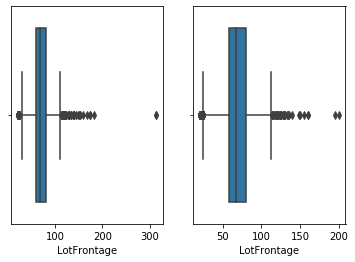

In [12]:
#Now proceeding for Numerical columns - LotFRontage
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.boxplot(df1['LotFrontage'],ax=ax1)
sns.boxplot(df2['LotFrontage'],ax=ax2)

In [13]:
#There are outliers, let us not rmeove them, rather check the median for non-outliers (like 125) and replace for missing values
df1['LotFrontage'].fillna(df1[df1['LotFrontage']<125]['LotFrontage'].median(),inplace=True)
df2['LotFrontage'].fillna(df2[df2['LotFrontage']<125]['LotFrontage'].median(),inplace=True)

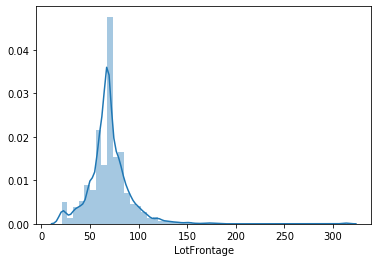

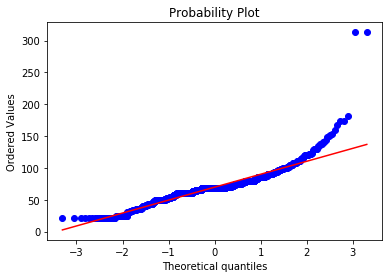

In [14]:
#Check the distribution of LotFrontage after change
sns.distplot(df1['LotFrontage'])
fig = plt.figure()
res = stats.probplot(df1['LotFrontage'], plot=plt)

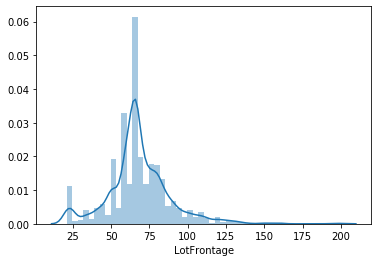

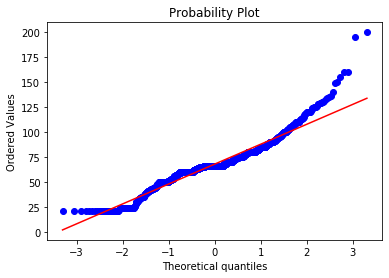

In [15]:
#Check the distribution of LotFrontage in test
sns.distplot(df2['LotFrontage'])
fig = plt.figure()
res = stats.probplot(df2['LotFrontage'], plot=plt)

In [16]:
## It is observed that they are not normally ditrbuted and checking through other notebooks, we standardise them using log
df1['LotFrontage'] = np.log(df1['LotFrontage'])
df2['LotFrontage'] = np.log(df2['LotFrontage'])

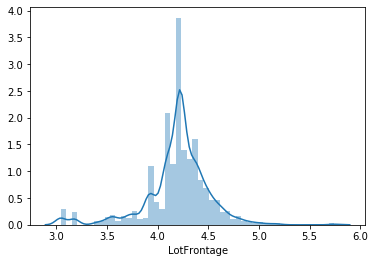

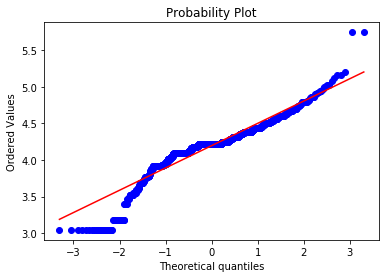

In [17]:
#Re-check the distribution
sns.distplot(df1['LotFrontage'])
fig = plt.figure()
res = stats.probplot(df1['LotFrontage'], plot=plt)

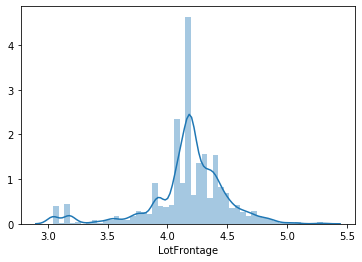

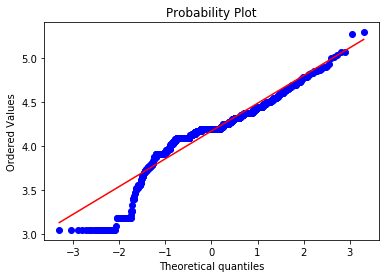

In [18]:
sns.distplot(df2['LotFrontage'])
fig = plt.figure()
res = stats.probplot(df2['LotFrontage'], plot=plt)

In [19]:
#Now the data is normalised, let us look into  Electrical, Utlilities, MSZoning,'Exterior1st', 'KitchenQual' all are string 
#and 'GarageArea' numerical.Let us fill the missing values for them - Garage let us make it 0

df1['Electrical'].fillna(df1['Electrical'].mode()[0], inplace=True)
df2['Utilities'].fillna(df2['Utilities'].mode()[0], inplace=True)
df2['MSZoning'].fillna(df2['MSZoning'].mode()[0], inplace=True)
df2['Exterior1st'].fillna(df2['Exterior1st'].mode()[0], inplace=True)
df2['KitchenQual'].fillna(df2['KitchenQual'].mode()[0], inplace=True)
df2['GarageArea'].fillna(0, inplace=True)

In [20]:
#Re-check missing values
print(df1.columns[df1.isna().any()])
print(df2.columns[df2.isna().any()])

Index([], dtype='object')
Index([], dtype='object')


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

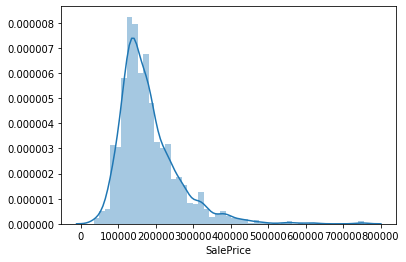

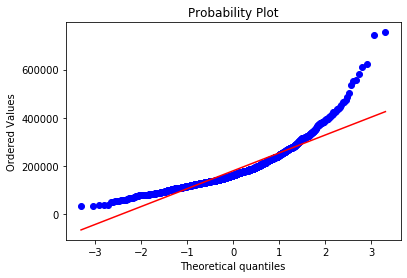

In [21]:
#Finally let us check the target fearture (SalePrice) and its disrtibution
sns.distplot(df1['SalePrice'])
fig=plt.figure()
stats.probplot(df1['SalePrice'], plot=plt)

In [22]:
#As expected they are not normally distributed. We have to log transform them.
df1['SalePrice'] = np.log(df1['SalePrice'])

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3982622308161888, 12.024050901109383, 0.9953761475636613))

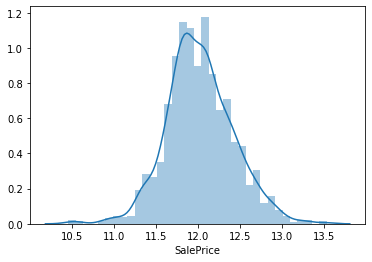

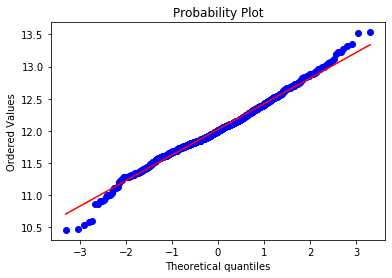

In [23]:
#Re-check the distribution now
sns.distplot(df1['SalePrice'])
fig=plt.figure()
stats.probplot(df1['SalePrice'], plot=plt)

In [24]:
#We shall proceed with simple categorical conversion using code to convert categories to numerical
cat_cols_train = df1.select_dtypes(include=np.object)
cat_cols_test = df2.select_dtypes(include=np.object)

for i in cat_cols_train:
    df1[i] = df1[i].astype('category')
    df1[i] = df1[i].cat.codes

for j in cat_cols_test:
    df2[j] = df2[j].astype('category')
    df2[j] = df2[j].cat.codes

In [25]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,4.382027,11622,1,1,3,3,0,...,120,0,2,2,1,0,6,2010,8,4
1,1462,20,3,4.394449,14267,1,1,0,3,0,...,0,0,2,4,0,12500,6,2010,8,4
2,1463,60,3,4.304065,13830,1,1,0,3,0,...,0,0,2,2,1,0,3,2010,8,4
3,1464,60,3,4.356709,9978,1,1,0,3,0,...,0,0,2,4,1,0,6,2010,8,4
4,1465,120,3,3.761200,5005,1,1,0,1,0,...,144,0,2,4,1,0,1,2010,8,4


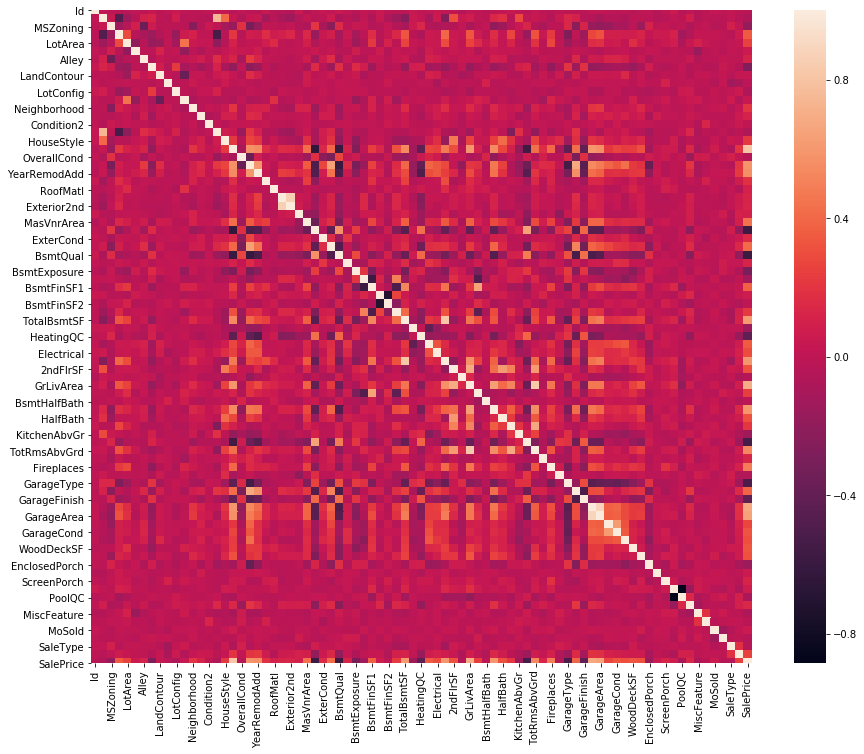

In [26]:
#Now all changes are done we shall check the contents and also see for any improved collinearity between features
plt.figure(figsize=(15,12))
sns.heatmap(df1.corr(), square=True)

#Observation

1. MSSubClass & BldgType - 74.6%
2. SalePrice & OverallQual - 81.7%
3. Exterior1st & Exterior2nd - 85.4%
4. GarageYrBlt & YearBuilt - 67.7%
5. 1stFlrSF & TotalBsmtSF - 81.9%
6. GrLivArea & 2ndFlrSF - 68.7%
7. GrLivArea & TotRmsAbvGrd - 82.5%
8. SalePrice & GrLivArea - 70.0%
9. TotRmsAbvGrd & BedroomAbvGr - 67.6%
10. GarageCars & GarageArea - 88.2%
11. SalePrice & GarageCars -68.0%
12. SalePrice & GarageArea -68.0%

Based on the above observation, we should NOT remove OverallQual, GrLivArea, GarageCars as they are collinear to target. 

We can remove GarageArea as that is collinear with GarageCars, also if you remember we have filled missing values for it

Alternately we can remove 'MSSubClass', 'Exterior1st', 'GarageYrBlt','1stFlrSF', '2ndFlrSF','TotRmsAbvGrd','GarageArea'

In [27]:
#Safe keeping of the data and create new working data frame for train and test
train_data= df1.copy()
test_data = df2.copy()
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,4.382027,11622,1,1,3,3,0,...,120,0,2,2,1,0,6,2010,8,4
1,1462,20,3,4.394449,14267,1,1,0,3,0,...,0,0,2,4,0,12500,6,2010,8,4
2,1463,60,3,4.304065,13830,1,1,0,3,0,...,0,0,2,2,1,0,3,2010,8,4
3,1464,60,3,4.356709,9978,1,1,0,3,0,...,0,0,2,4,1,0,6,2010,8,4
4,1465,120,3,3.761200,5005,1,1,0,1,0,...,144,0,2,4,1,0,1,2010,8,4


In [28]:
drop_cols = ['MSSubClass', 'Exterior1st', 'GarageYrBlt','1stFlrSF', '2ndFlrSF','TotRmsAbvGrd','GarageArea']
for i in drop_cols:
    train_data.drop(i, axis=1, inplace=True)
    test_data.drop(i, axis=1, inplace=True)

In [29]:
#All set done, let us now check the basic Linear Regression and OLS model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sms

In [30]:
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]
print(X.shape)
print(y.shape)

(1460, 73)
(1460,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [32]:
linReg = LinearRegression()
linReg.fit(X_train,y_train)
y_lin_pred=linReg.predict(X_test)
print('Mean Squared Error is ',metrics.mean_squared_error(y_test,y_lin_pred))
print('R2 value is ',metrics.r2_score(y_test,y_lin_pred))

Mean Squared Error is  0.02142116376698735
R2 value is  0.8737303388628352


In [33]:
sm_mod = sms.OLS(y,X).fit()
print(sm_mod.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.523e+05
Date:                Fri, 10 Jul 2020   Prob (F-statistic):                        0.00
Time:                        19:15:20   Log-Likelihood:                          848.40
No. Observations:                1460   AIC:                                     -1553.
Df Residuals:                    1388   BIC:                                     -1172.
Df Model:                          72                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Observation 3:
1. The R2 score and Mean Squared Error looks decent
2. Looking into the P1 value from OLS model we can remove values that have P1 value >0.1 we can try removing the features

In [34]:
P_val_cols1 = ['MSZoning','LandContour','Utilities','LotConfig','Neighborhood',
'Condition1','BldgType','RoofStyle','RoofMatl','Exterior2nd',
'MasVnrType','MasVnrArea','ExterQual','Foundation','BsmtCond','BsmtFinSF1','BsmtUnfSF',
'Heating','Electrical','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','GarageFinish',
'GarageQual','GarageCond','OpenPorchSF','3SsnPorch','PoolQC','Fence','MiscVal','MoSold','SaleType']

for i in P_val_cols1:
    train_data.drop(i, axis=1, inplace=True)
    test_data.drop(i, axis=1, inplace=True)

In [35]:
X1= train_data.iloc[:,:-1]
y1=train_data.iloc[:,-1]
X1_train, X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=42)

In [36]:
lin_mod =linReg.fit(X1_train,y1_train)
y1_lin_pred=lin_mod.predict(X1_test)
print('Mean Squared Error is ',metrics.mean_squared_error(y1_test,y1_lin_pred))
print('R2 value is ',metrics.r2_score(y1_test,y1_lin_pred))

Mean Squared Error is  0.019450040610662862
R2 value is  0.8853493645944011


In [37]:
sm1_mod=sms.OLS(y1,X1).fit()
print(sm1_mod.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.647e+05
Date:                Fri, 10 Jul 2020   Prob (F-statistic):                        0.00
Time:                        19:15:20   Log-Likelihood:                          824.68
No. Observations:                1460   AIC:                                     -1567.
Df Residuals:                    1419   BIC:                                     -1351.
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [38]:
from sklearn.linear_model import Ridge, Lasso
rr = Ridge(alpha=0.01)
rr_mod=rr.fit(X1_train,y1_train)
y2_ridg_pred=rr_mod.predict(X1_test)
print('Mean Squared Error is ',metrics.mean_squared_error(y1_test,y2_ridg_pred))
print('R2 value is ',metrics.r2_score(y1_test,y2_ridg_pred))

Mean Squared Error is  0.019450298128765944
R2 value is  0.8853478466225502


In [39]:
lso = Lasso()
lso_mod=lso.fit(X1_train,y1_train)
y3_lso_pred=lso_mod.predict(X1_test)
print('Mean Squared Error is ',metrics.mean_squared_error(y1_test,y3_lso_pred))
print('R2 value is ',metrics.r2_score(y1_test,y3_lso_pred))

Mean Squared Error is  0.03464674603645601
R2 value is  0.7957705319320296


In [40]:
from sklearn.ensemble import GradientBoostingRegressor
grb = GradientBoostingRegressor()
grb_mod= grb.fit(X1_train, y1_train)
y4_grb_pred=grb_mod.predict(X1_test)
print('Mean Squared Error is ',metrics.mean_squared_error(y1_test,y4_grb_pred))
print('R2 value is ',metrics.r2_score(y1_test,y4_grb_pred))

Mean Squared Error is  0.017084752547707267
R2 value is  0.8992918434181456


In [41]:
#Predicting the test value now into the test data set
test_grb_pred = grb_mod.predict(test_data)
print(test_grb_pred)

[11.66753806 11.82173399 12.05035997 ... 11.79321202 11.68325702
 12.37574835]


In [42]:
result = pd.DataFrame({'Id':test_data['Id'],'SalePrice':np.exp(test_grb_pred)})
result.to_csv('result.csv')